In [1]:
import tweepy
import nltk
import os
import matplotlib.pyplot as plt

In [2]:
auth = tweepy.OAuthHandler("-------")
auth.set_access_token("--", "----")

api = tweepy.API(auth)

In [3]:
tweets = []
fetched_tweets = api.search(q = 'eksi', count = 100, lang = "tr")
# parsing tweets one by one


In [4]:
for tweet in fetched_tweets:
    tweets.append(tweet.text)
    if "beykoz" in (tweet.user.location).lower() or "beykoz" in (tweet.text).lower():
        print(tweet.user.location)
        print(classify(tweet.text))
    else:
        continue
    
def remove_duplicates(l):
    return list(set(l))
tweets = remove_duplicates(tweets)

In [5]:
def cleanTweets(tweets):
    clean_data = []
    for tweet in tweets:
        item = ' '.join(word.lower() for word in tweet.split() if not word.startswith('#') and not word.startswith('@') and not word.startswith('http') and not word.startswith('RT') and not word.startswith('i̇'))
        if item == "" or item == "RT":
            continue
        clean_data.append(item)
    return clean_data

def getTrainData():
	positives, negatives, traindata = [], [], []
	for filename in os.listdir("train"):
	    if filename == "positives.txt":
		    with open('train/'+filename) as f:
			    positives = [(tweet, 'pos') for tweet in f.readlines()]
	    if filename == "negatives.txt":
		    with open('train/'+filename) as f:
			    negatives = [(tweet, 'neg') for tweet in f.readlines()]

	for (words, sentiment) in negatives + positives:
		words_filtered = [e for e in words.split() if len(e) > 2]
		traindata.append((words_filtered, sentiment))
	print(len(positives))
	print(len(negatives))
    
	return traindata

def export(filename, data, p):
    with open(filename, p) as output:
    	for line in data:
        	output.write(line)
            
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words)
    return features

In [6]:
data = getTrainData()
word_features = get_word_features(get_words_in_tweets(data))
allsetlength = int((len(data)/10)*8)
training_set = nltk.classify.apply_features(extract_features, data[:allsetlength])
test_set = data[allsetlength:]
classifier = nltk.NaiveBayesClassifier.train(training_set)

93
90


In [7]:
def classify(tweet):
	return (classifier.classify(extract_features(tweet.split())))

In [39]:
tweets = cleanTweets(tweets)
posList = []
negList = []
for tweet in tweets:
    if classify(tweet) == "pos":
        posList.append(tweet)
        print("pos")
        print(tweet)
    else:
        print("neg")
        print(tweet)
        negList.append(tweet)

TotalSehir = len(posList) + len(negList)
TotalPos = len(posList)
TotalNeg = len(negList)
    

neg
genelde kız tarafları: süslü püslü kızlar, takım elbiseli saçlarını yalatmış gibi ıslak olan beyler yoora'nın tarafı: şampiy…
neg
- planlı çalışıcam, ders yapıcam, düzgün bir birey olucam. 'ertesi gün - ya amına kodumun öğretmeni yine eksi atmı…
pos
hayat sana ekşi limonlar sunuyorsa, sen de çiğ köfte ye! neden limonata yapasın ki bence.
neg
ekşi maya artı sayı şeşüdü dogmacılık
pos
çinli'lerin taşı su ile deldiklerinde gösterdikleri sabır ; kibrit çöplerinden tasarlayıp yapılan bu maket ve asırl…
neg
evet öyle ama bunu direk tubayla alakalandırmak saçma.ünlülerin çoğu zaten o gece hayatını yaşıyor.tub…
neg
- metin şen; ali koç açıklama yapacak, aykut’un yardımcı antrenörleri ile alakalı - tamam başkan, biz ne yapabiliriz? -…
neg
- başkanım buda mı olmaz? bakın aykut burda insanları üzüyormuş, neden insanları üzdün kocaman diye algı yaparız..…
neg
i̇slam'da ekonomi dersimiz bu hafta da yunus ekşi hocamızla dolu dolu geçiyor. kaynak kitabımız mete gündo…
neg
kök üç eksi iki 💜
neg
i̇

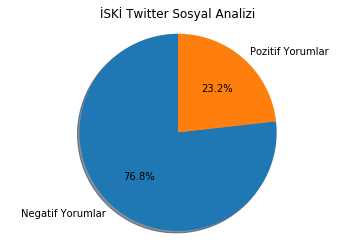

In [40]:
labels = 'Negatif Yorumlar', 'Pozitif Yorumlar' #pastadaki başlıkları tanımlıyoruz.
sizes = [TotalNeg, TotalPos] #pastada gözükecek verileri tanımlıyoruz.

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("İSKİ Twitter Sosyal Analizi") 
plt.show() #oluşturduğumuz pastayı çıktı alıyoruz.